<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/src/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Introduction to Cartopy</h1>
<h3>Unidata AMS 2021 Student Conference</h3>

<div style="clear:both"></div>
</div>

---

<div style="float:right; width:1200 px"><img src="../../instructors/images/cartopy-basic-preview.png" alt="Cartopy Example Map" style="height: 300px;"></div>


### Focuses
* Create a basic figure using CartoPy
* Add maps to the figure
* Plot georeferenced data on the figure


### Objectives
1. [Create a Map](#1.-Make-a-simple-map)
1. [Add Features to Map](#2.-Add-features-to-map)
1. [Plotting Data on Map](#3.-Plotting-data)

---

### Imports

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from metpy.calc import wind_speed
from metpy.units import units
from metpy.plots import USCOUNTIES

print('Set up done!')


Set up done!


## 1. Make a simple map

Let's start with a simple map - without adding any additional parameters

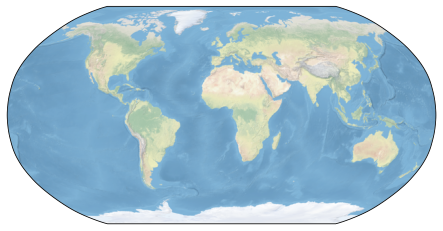

In [2]:
# Works with matplotlib's built-in transform support
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111, projection=ccrs.Robinson())

# Set extent to cover the entire globe
ax.set_global()

# Add a stock image to the map - the background
ax.stock_img()

Now that we have a basic map, let's add some parameters and zoom in a bit

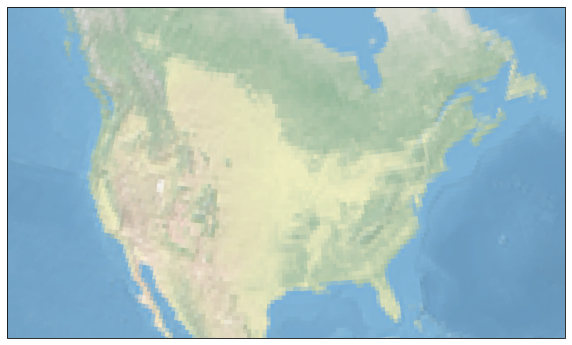

In [3]:
# Set up a globe with a specific radius
globe = ccrs.Globe(semimajor_axis=6371000.)

# Set up a Lambert Conformal projection
proj = ccrs.LambertConformal(standard_parallels=[25.0], globe=globe)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Sets the extent using a lon/lat box
ax.set_extent([-130, -60, 20, 55])

ax.stock_img()

<a href="#top">Top</a>

---

## 2. Add features to map

CartoPy has a few helper methods for adding maps to the plot

C:\Users\al025482\.conda\envs\pyaos-ams-2021\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


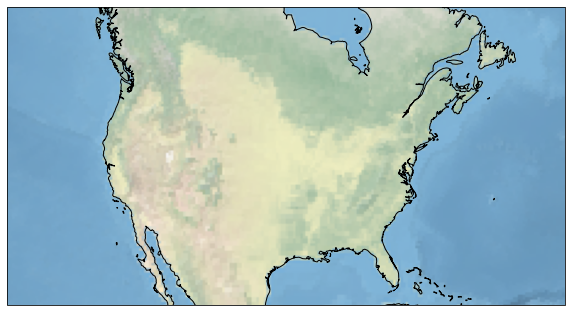

In [4]:
# Setup the figure and geoaxes
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

# Add the stock image
ax.stock_img()

# Add coastline contours to the map
ax.add_feature(cfeature.COASTLINE)

# Set the extent
ax.set_extent([-130, -60, 20, 55])

In addition to coastlines, there are a variety of natural earth features one can add to a map

C:\Users\al025482\.conda\envs\pyaos-ams-2021\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\al025482\.conda\envs\pyaos-ams-2021\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\al025482\.conda\envs\pyaos-ams-2021\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\al025482\.conda\envs\pyaos-ams-2021\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn('Downl

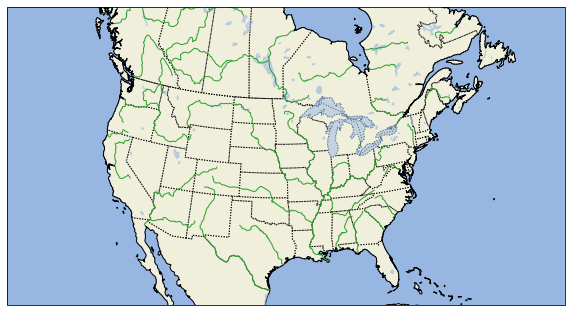

In [5]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

# Add variety of features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)

# Can also supply matplotlib kwargs
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS, edgecolor='tab:green')

# Set the extent
ax.set_extent([-130, -60, 20, 55])

The map features are available at several different scales depending on how large the area you are covering is. The scales can be accessed using the `with_scale method`. Natural Earth features are available at 110m, 50m and 10m.

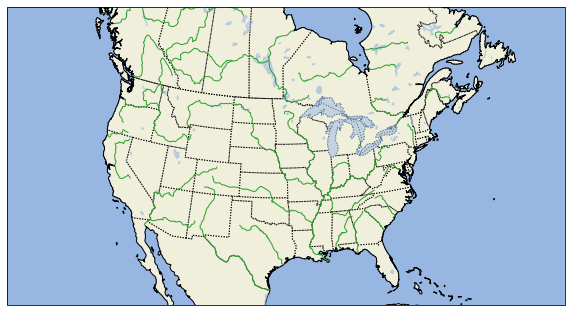

In [6]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

# Add variety of features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)

# Can also supply matplotlib kwargs
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle=':')
ax.add_feature(cfeature.STATES.with_scale('50m'), linestyle=':')
ax.add_feature(cfeature.LAKES.with_scale('50m'), alpha=0.5)
ax.add_feature(cfeature.RIVERS.with_scale('50m'), edgecolor='tab:green')

ax.set_extent([-130, -60, 20, 55])

Interested in other map features? Check out the documentation from the [Natural Earth Project](http://www.naturalearthdata.com/)

### US County Boundaries

MetPy also has US County boundaries available at 20m, 5m, and 500k resolutions. Checkout the example below to see the difference between different resolutions.

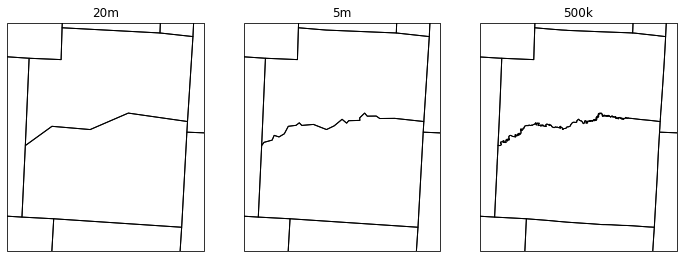

In [7]:
proj = ccrs.LambertConformal(central_longitude=-85.0, central_latitude=45.0)

fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(1, 3, 1, projection=proj)
ax2 = fig.add_subplot(1, 3, 2, projection=proj)
ax3 = fig.add_subplot(1, 3, 3, projection=proj)

for scale, axis in zip(['20m', '5m', '500k'], [ax1, ax2, ax3]):
    axis.set_extent([270.25, 270.9, 38.15, 38.75], ccrs.Geodetic())
    axis.add_feature(USCOUNTIES.with_scale(scale), edgecolor='black')
    axis.set_title(scale)

<a href="#top">Top</a>

---
## 3. Plotting data

Let's try plotting a point on the map near Boulder, Colorado using `ax.plot`

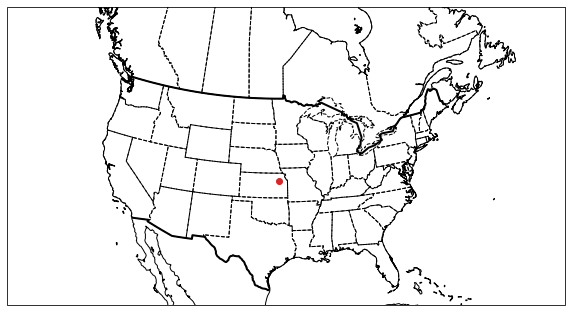

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linewidth=2)
ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='black')

# Add a point to the map using longitude, lat, and use a circle as the marker
ax.plot(-105, 40, marker='o', color='tab:red')

ax.set_extent([-130, -60, 20, 55])

So that did not succeed at putting a marker at -105 longitude, 40 latitude (Boulder, CO). Instead, what actually happened is that it put the marker at (-105, 40) in the map projection coordinate system; in this case that's a Lambert Conformal projection, and x,y are assumed in meters relative to the origin of that coordinate system. To get CartoPy to treat it as longitude/latitude, we need to tell it that's what we're doing. We do this through the use of the transform argument to all of the plotting functions.

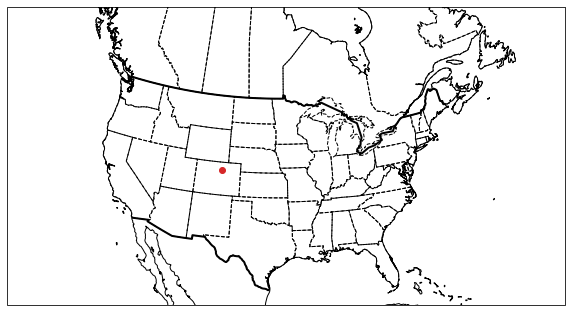

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linewidth=2)
ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='black')

# Set the projection of the data point such that it transforms the point from lon, lat to the projected coordinate system Lambert Conformal
data_projection = ccrs.PlateCarree()
ax.plot(-105, 40, marker='o', color='tab:red', transform=data_projection)

ax.set_extent([-130, -60, 20, 55])

This approach by CartoPy separates the data coordinate system from the coordinate system of the plot. It allows you to take data in any coordinate system (lon/lat, Lambert Conformal) and display it in any map you want. It also allows you to combine data from various coordinate systems seamlessly. This extends to all plot types, not just plot (ex. `contour`):

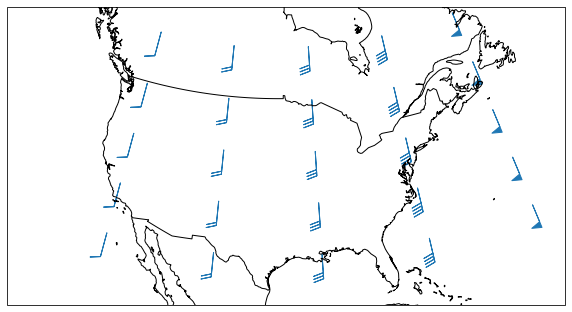

In [10]:
# Create some synthetic gridded wind data

# Note that all of these winds have u = 0 -> south wind
v = (np.full((5, 5), 10, dtype=np.float64) + 10 * np.arange(5)) * units.knots
u = np.zeros_like(v) * units.knots
speed = wind_speed(u, v)

# Create arrays of longitude and latitude
x = np.linspace(-120, -60, 5)
y = np.linspace(30, 55, 5)

# Plot as normal
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot wind barbs--CartoPy handles reprojecting the vectors properly for the
# coordinate system
ax.barbs(x, y, u.m, v.m, transform=ccrs.PlateCarree(), color='tab:blue')

ax.set_extent([-130, -60, 20, 55])

<a href="#top">Top</a>

---

## Check out these resources

* Interested in learning more about CartoPy? Be sure to check out the [CartoPy Example Gallery](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html)
* Also be sure to checkout the [general guide to CartoPy](https://scitools.org.uk/cartopy/docs/latest/#getting-started) which includes instructions on downloading to your local machine 

### Related Notebooks
* [Matplotlib: Basics notebook](https://nbviewer.jupyter.org/github/Unidata/pyaos-ams-2021/blob/master/notebooks/visualization/matplotlib-basics.ipynb)